In [1]:
%load_ext autoreload
%autoreload 2
import utils
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing.dummy import Pool as ThreadPool
from tqdm import tqdm
from multiprocessing import Pool
import numpy.ma as ma

In [2]:
event_data = np.loadtxt("./data/events.txt")
position_data = np.loadtxt("./data/groundtruth.txt")

In [96]:
t_start = 0.1
duration = 1.0
# 
img_height = 180
img_width = 240
depth_img = np.zeros((img_height, img_width))
depth_img.shape

(180, 240)

In [97]:
events_range = utils.get_events_range(event_data, t_start, duration)
events = utils.get_events_in_row(events_range, 135)

In [102]:
result = np.full((utils.height+1, utils.width+1, 2), [np.inf, 0])

In [103]:
for e in events:
    #convert position to px
    pos = utils.pos_to_grid(events, position_data, utils.get_interpolated_position(e[0], position_data))
    
    c_x = int(e[1])
    w_x = int(pos)
    if (c_x == utils.height) or (w_x >= utils.width - 5):
        continue
    
    elem = result[c_x, w_x]
    if elem[0] == np.inf:
        elem[0] = 0
    
    if elem[0] > 10:
        elem[0] = 10
    if elem[0] < -10:
        elem[0] = -10
        
    count = elem[1]
    
    #forward data
    if result[c_x - 2, w_x + 1][1] < count + 1:
        result[c_x - 2, w_x + 1][0] = elem[0] - 1
        result[c_x - 2, w_x + 1][1] = count + 1
    
    if result[c_x - 1, w_x + 2][1] < count + 1:
        result[c_x - 1, w_x + 2][0] = elem[0] + 1
        result[c_x - 1, w_x + 2][1] = count + 1
    
    if result[c_x - 1, w_x + 1][1] < count + 1:
        result[c_x - 1, w_x + 1][0] = elem[0]
        result[c_x - 1, w_x + 1][1] = count + 1
        
#     if result[c_x - 3, w_x + 1][1] < count + 1:
#         result[c_x - 3, w_x + 1][0] = elem[0] - 2
#         result[c_x - 3, w_x + 1][1] = count + 1
        
#     if result[c_x - 1, w_x + 2][1] < count + 1:
#         result[c_x - 1, w_x + 2][0] = elem[0] + 2
#         result[c_x - 1, w_x + 2][1] = count + 1
        
    

In [104]:
result.max()

inf

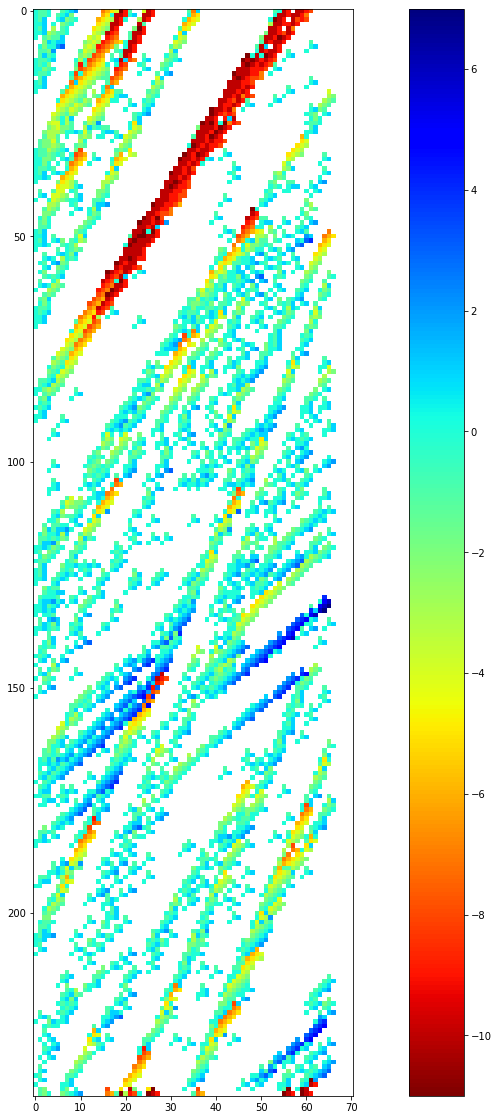

In [105]:
fig = plt.figure(figsize=(20, 20))

cmap = plt.cm.get_cmap("jet_r").copy()
cmap.set_bad(color='white')

mappable = im = plt.imshow(result[:,:,0], cmap=cmap)
fig.colorbar(mappable)

In [82]:
result_masked = ma.masked_where(result[:,:,0] == np.inf, result[:,:,0])

In [67]:
result_masked.max()

5.0

(array([  24.,   29.,   44.,   44.,   93.,  125.,  392.,  498., 1048.,
        4226.]),
 array([-200. , -179.5, -159. , -138.5, -118. ,  -97.5,  -77. ,  -56.5,
         -36. ,  -15.5,    5. ]),
 <BarContainer object of 10 artists>)

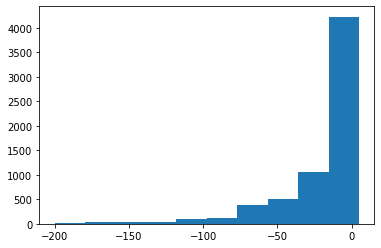

In [68]:
plt.hist(result_masked.flatten(), 10)

In [51]:
print(result_masked)

[[[0.0 0.0]
  [-2.0 1.0]
  [-2.0 2.0]
  ...
  [-- 0.0]
  [-- 0.0]
  [-- 0.0]]

 [[0.0 0.0]
  [-2.0 1.0]
  [-1.0 2.0]
  ...
  [-- 0.0]
  [-- 0.0]
  [-- 0.0]]

 [[0.0 0.0]
  [-1.0 1.0]
  [1.0 1.0]
  ...
  [-- 0.0]
  [-- 0.0]
  [-- 0.0]]

 ...

 [[0.0 0.0]
  [-2.0 1.0]
  [-4.0 2.0]
  ...
  [-- 0.0]
  [-- 0.0]
  [-- 0.0]]

 [[-- 0.0]
  [-2.0 1.0]
  [-4.0 2.0]
  ...
  [-- 0.0]
  [-- 0.0]
  [-- 0.0]]

 [[-- 0.0]
  [-2.0 1.0]
  [-3.0 2.0]
  ...
  [-- 0.0]
  [-- 0.0]
  [-- 0.0]]]


In [52]:
result_count = result[:,:,1]

(array([10880.,  1162.,   977.,   604.,   432.,   207.,   146.,   103.,
          114.,    76.]),
 array([ 0. ,  5.5, 11. , 16.5, 22. , 27.5, 33. , 38.5, 44. , 49.5, 55. ]),
 <BarContainer object of 10 artists>)

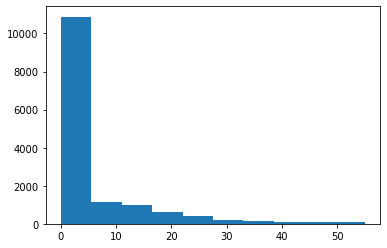

In [53]:
plt.hist(result_count.flatten())

In [54]:
mask = result[:,:,1] < 3
result_thresh = ma.masked_where(mask, result[:,:,0])

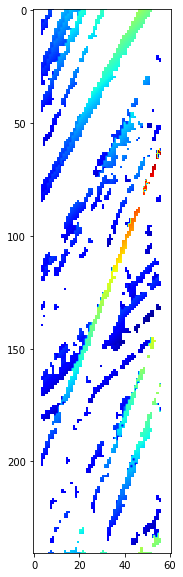

In [55]:
fig = plt.figure(figsize=(10, 10))

cmap = plt.cm.get_cmap("jet_r").copy()
cmap.set_bad(color='white')

mappable = im = plt.imshow(result_thresh, cmap=cmap)

In [17]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])